In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import string

In [11]:
colnames=['id', 'sentiment', 'text', 'misc'] 
df = pd.read_csv("SemEval2017-task4-dev.subtask-A.english.INPUT.txt", names=colnames, delimiter="\t")

In [13]:
df = df[['id', 'sentiment', 'text']]

In [14]:
df

,id,sentiment,text
0,619950566786113536,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T..."
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...
2,619971047195045888,negative,If these runway renovations at the airport pre...
3,619974445185302528,neutral,If you could ask an onstage interview question...
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...
...,...,...,...
20627,681877834982232064,neutral,@ShaquilleHoNeal from what I think you're aski...
20628,681879579129200640,positive,"Iran ranks 1st in liver surgeries, Allah bless..."
20629,681883903259357184,neutral,Hours before he arrived in Saudi Arabia on Tue...
20630,681904976860327936,negative,@VanityFair Alex Kim Kardashian worth how to ...


In [42]:
female_words = ['woman', 'women', 'she', 'girl', 'girls', 'female', 'mother', 
                'daughter', 'sister', 'aunt', 'grandmother', 'her', 'hers', 'sis', 'miss', 'madam', 'mrs']
male_words = ['man', 'men', 'he', 'boy', 'boys', 'male', 'father', 'son', 'brother', 
              'uncle', 'grandfather', 'him', 'his', 'bro', 'mister', 'sir', 'mr']

In [43]:
mapping = dict(zip(female_words+male_words, male_words+female_words))

In [44]:
gendered_terms = []
gen_term_sentences = 0

for sentence in df.text.values:
    sen = sentence.lower().split(' ')
    gen_terms = []
    for word in sen:
        w = ''.join([c for c in word if c not in string.punctuation])
        if w in mapping:
            gen_terms.append(w)
    if len(gen_terms) != 0:
        gen_term_sentences += 1
    gendered_terms.append(gen_terms)

In [45]:
gen_term_sentences

4779

In [46]:
df["gendered_terms"] = gendered_terms

In [53]:
from functools import reduce
all_gendered_terms = reduce(lambda z, y :z + y, gendered_terms)
all_gendered_terms[:10]

['miss', 'miss', 'his', 'miss', 'miss', 'miss', 'miss', 'he', 'miss', 'his']

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


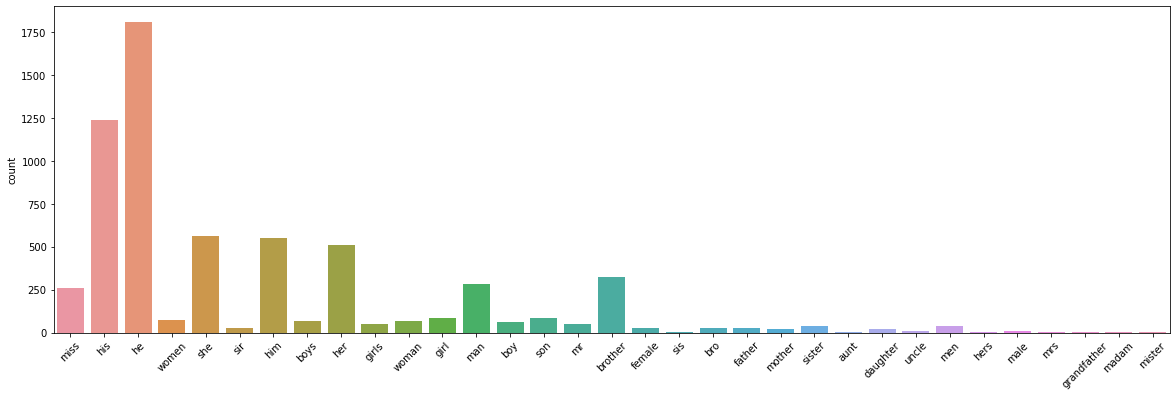

In [54]:
plt.figure(figsize=(20, 6))
sns.countplot(all_gendered_terms)
plt.xticks(rotation=45)
plt.show()

In [55]:
flipped_sentences = []

for sentence in df.text.values:
    sen = sentence.lower().split(' ')
    flipped_sentence = []
    for word in sen:
        w = ''.join([c for c in word if c not in string.punctuation])
        if w in mapping:
            flipped_sentence.append(mapping[w])
        else:
            flipped_sentence.append(word)
    flipped_sentences.append(' '.join(flipped_sentence))

In [56]:
df["flipped_sentences"] = flipped_sentences

In [57]:
df

,id,sentiment,text,gendered_terms,flipped_sentences
0,619950566786113536,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",[],"picturehouse's, pink floyd's, 'roger waters: t..."
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...,[],order go set a watchman in store or through ou...
2,619971047195045888,negative,If these runway renovations at the airport pre...,[],if these runway renovations at the airport pre...
3,619974445185302528,neutral,If you could ask an onstage interview question...,[miss],if you could ask an onstage interview question...
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...,[],a portion of book sales from our harper lee/go...
...,...,...,...,...,...
20627,681877834982232064,neutral,@ShaquilleHoNeal from what I think you're aski...,[],@shaquillehoneal from what i think you're aski...
20628,681879579129200640,positive,"Iran ranks 1st in liver surgeries, Allah bless...",[],"iran ranks 1st in liver surgeries, allah bless..."
20629,681883903259357184,neutral,Hours before he arrived in Saudi Arabia on Tue...,[he],hours before she arrived in saudi arabia on tu...
20630,681904976860327936,negative,@VanityFair Alex Kim Kardashian worth how to ...,[],@vanityfair alex kim kardashian worth how to ...


In [61]:
df.text.values[3]

'If you could ask an onstage interview question at Miss USA tomorrow, what would it be?'

In [62]:
df.flipped_sentences.values[3]

'if you could ask an onstage interview question at mister usa tomorrow, what would it be?'

In [63]:
gendered_terms_flipped = []

for sentence in df.flipped_sentences.values:
    sen = sentence.lower().split(' ')
    gen_terms = []
    for word in sen:
        w = ''.join([c for c in word if c not in string.punctuation])
        if w in mapping:
            gen_terms.append(w)
    gendered_terms_flipped.append(gen_terms)

In [64]:
df["gendered_terms_flipped"] = gendered_terms_flipped

In [67]:
df.iloc[300:350]

,id,sentiment,text,gendered_terms,flipped_sentences,gendered_terms_flipped
300,621253287803777024,neutral,"Hello @HOMEmcr, is it true that George Osborne...",[],"hello @homemcr, is it true that george osborne...",[]
301,621272805464764417,neutral,Wait - Go Set A Watchman is really the 1st dra...,[],wait - go set a watchman is really the 1st dra...,[]
302,621276708105252864,neutral,Let George Osborne know how you feel in Manche...,[],let george osborne know how you feel in manche...,[]
303,621290198605950976,positive,Delivery has just arrived for Sunday's Nationa...,[],delivery has just arrived for sunday's nationa...,[]
304,621299438313566208,positive,"Congratulations to Olivia Jordan, who won Miss...",[miss],"congratulations to olivia jordan, who won mist...",[mister]
305,621307018096218113,neutral,I just realized. After the whole slow mo march...,"[her, she]",i just realized. after the whole slow mo march...,"[him, he]"
306,621307763168268289,neutral,"So George Osborne, Therera May &amp; Yvette Co...",[],"so george osborne, therera may &amp; yvette co...",[]
307,621319689633988608,positive,Harper Lee's second novel Go Set a Watchman ma...,[],harper lee's second novel go set a watchman ma...,[]
308,621326803148259329,positive,@BaekDoXiuHun Hi! My bias is KAI bc he stole m...,"[he, him, he]",@baekdoxiuhun hi! my bias is kai bc she stole ...,"[she, her, she]"
309,621346514032545792,neutral,"George Osborne on British contributions ""we do...",[],"george osborne on british contributions ""we do...",[]


In [71]:
df.iloc[308].text, df.iloc[308].flipped_sentences

("@BaekDoXiuHun Hi! My bias is KAI bc he stole my heart the 1st tym I saw him in Growl. He is my 1st love in KPOP &amp; it's not changing til now",
 "@baekdoxiuhun hi! my bias is kai bc she stole my heart the 1st tym i saw her in growl. she is my 1st love in kpop &amp; it's not changing til now")

In [72]:
df.to_csv('semeval_flipped.tsv', sep='\t')

In [73]:
original = pd.read_csv("SemEval2017-task4-dev.subtask-A.english.INPUT.txt", names=colnames, delimiter="\t")
original.to_csv('semeval_original.tsv', sep='\t')